In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,StratifiedKFold
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/Sumit/Desktop/NIIT/Projects/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [3]:
df.shape

(3000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [9]:
df['Grade'].unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [11]:
df['Grade'].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

In [7]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Expected price')

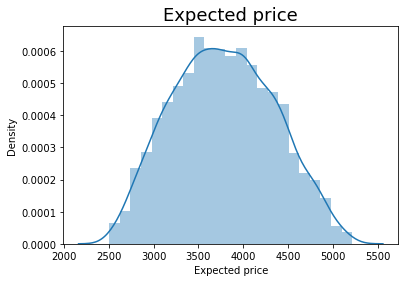

In [29]:
plt.figure(figsize=(6,4))
sns.distplot(df['Expected price'])
plt.title('Expected price',fontsize=18)

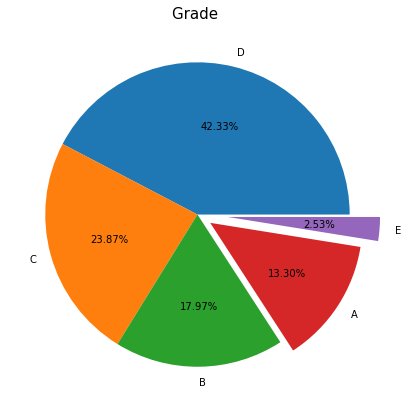

In [35]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Grade ',fontsize=15)                  # Set the title of the graph
percentage = df["Grade"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Grade"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, explode=[0,0,0,0.1,0.2],autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [38]:
df['Nbedrooms'].unique()

array([5, 4, 7, 8, 6, 3, 2], dtype=int64)

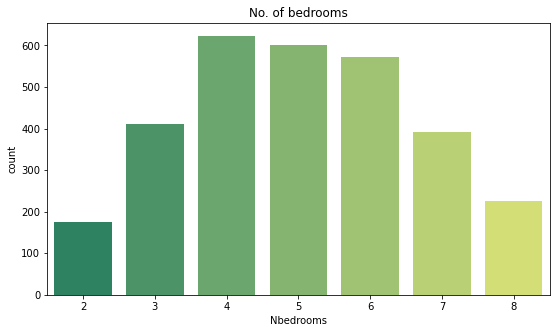

In [45]:
plt.figure(figsize=(9,5))
sns.countplot('Nbedrooms',data=df,palette='summer')
plt.title('No. of bedrooms');

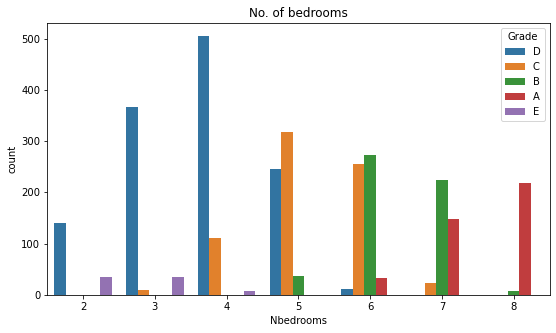

In [67]:
plt.figure(figsize=(9,5))
sns.countplot('Nbedrooms',hue='Grade',data=df)
plt.title('No. of bedrooms');

In [48]:
df['Nbwashrooms'].unique()

array([4, 3, 6, 7, 5, 2, 8, 1], dtype=int64)

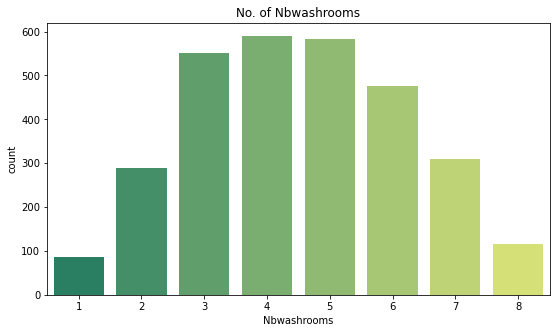

In [50]:
plt.figure(figsize=(9,5))
sns.countplot('Nbwashrooms',data=df,palette='summer')
plt.title('No. of Nbwashrooms');

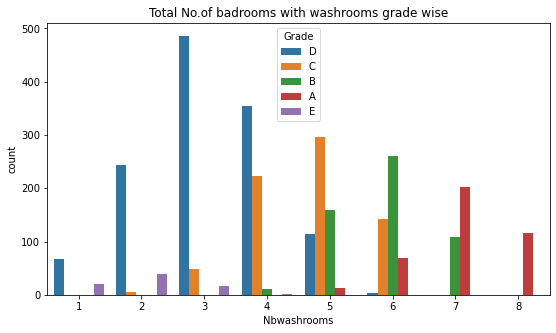

In [61]:
plt.figure(figsize=(9,5))
sns.countplot('Nbwashrooms',hue='Grade',data=df)
plt.title('Total No.of badrooms with washrooms grade wise');

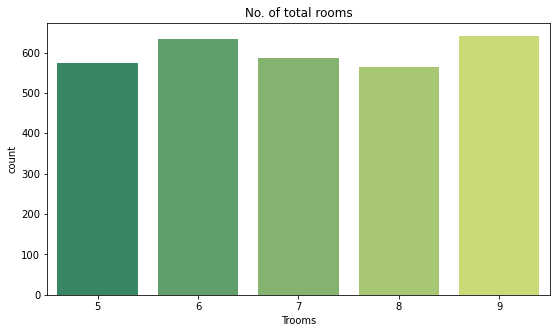

In [58]:
plt.figure(figsize=(9,5))
sns.countplot('Trooms',data=df,palette='summer')
plt.title('No. of total rooms');

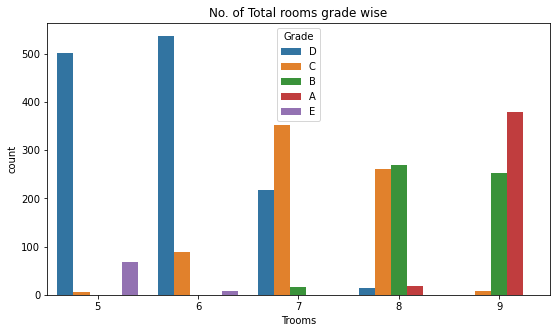

In [57]:
plt.figure(figsize=(9,5))
sns.countplot('Trooms',hue='Grade',data=df)
plt.title('No. of Total rooms grade wise');

In [64]:
df['Area(total)'].unique()

array([339, 358, 324, 330, 320, 314, 332, 323, 351, 308, 309, 303, 321,
       345, 307, 337, 333, 343, 322, 326, 329, 292, 298, 296, 354, 318,
       301, 352, 348, 304, 336, 355, 299, 349, 310, 344, 338, 312, 328,
       342, 335, 359, 313, 334, 300, 302, 317, 306, 341, 293, 294, 327,
       311, 347, 290, 360, 316, 295, 315, 331, 305, 356, 346, 357, 350,
       297, 325, 291, 340, 353, 319], dtype=int64)

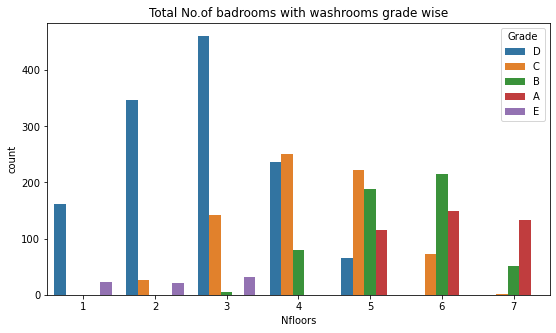

In [65]:
plt.figure(figsize=(9,5))
sns.countplot('Nfloors',hue='Grade',data=df)
plt.title('Total No.of badrooms with washrooms grade wise');

Text(0.5, 1.0, 'Expected price room wise')

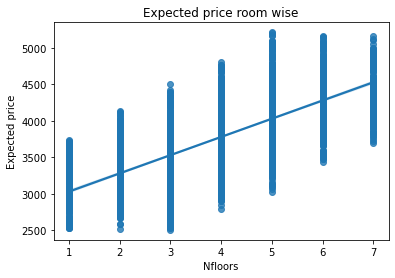

In [85]:
sns.regplot(x='Nfloors',y='Expected price',data=df)
plt.title('Expected price room wise')

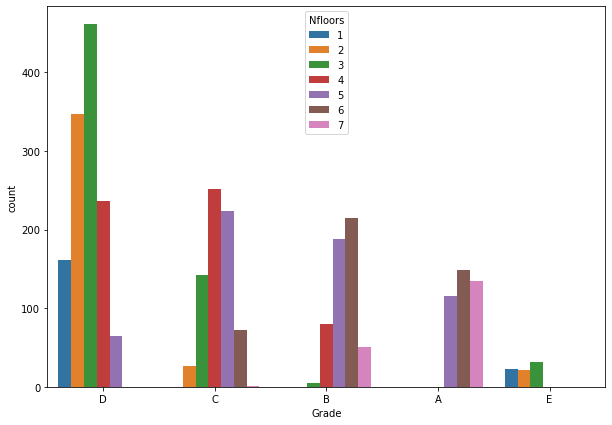

In [87]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(data=df,x='Grade',hue='Nfloors')
plt.show()

In [ ]:
#A and B grade houses which are the best qualities have 7,6,5 number of floors
#E and D grade houses which are poor quality houses have 1,2,3 nuber of floors

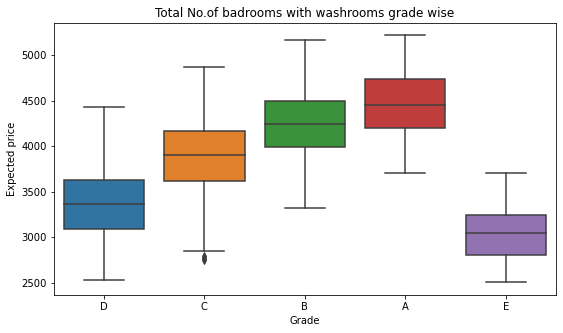

In [70]:
plt.figure(figsize=(9,5))
sns.boxplot(y='Expected price',x='Grade',data=df)
plt.title('Grade wise price distribution');

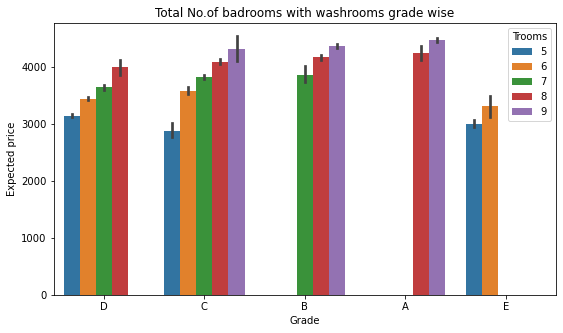

In [73]:
plt.figure(figsize=(9,5))
sns.barplot(y='Expected price',x='Grade',hue='Trooms',data=df)
plt.title('Total No.of badrooms with washrooms grade wise');

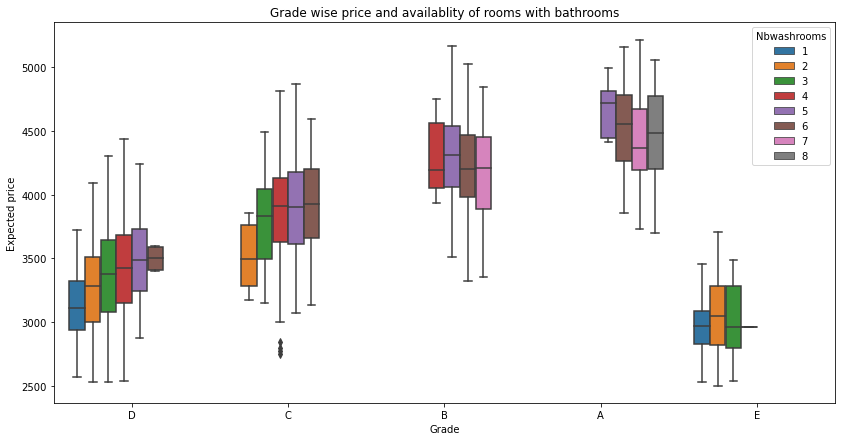

In [78]:
plt.figure(figsize=(14,7))
sns.boxplot('Grade', 'Expected price', data=df, hue='Nbwashrooms');
plt.title('Grade wise price and availablity of rooms with bathrooms');

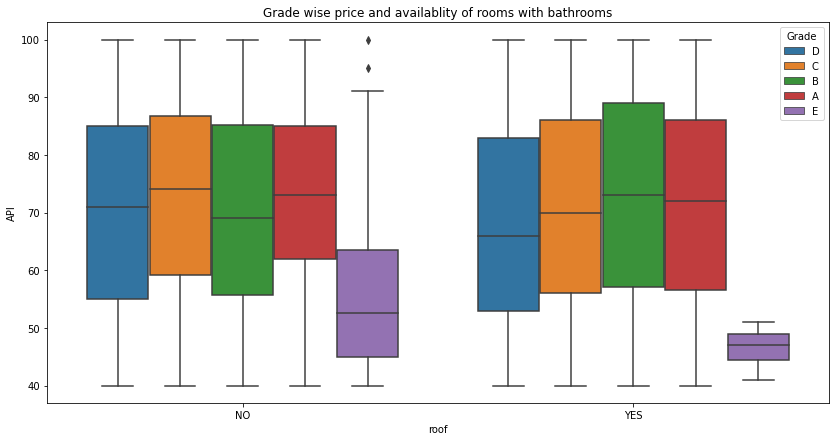

In [82]:
plt.figure(figsize=(14,7))
sns.boxplot('roof', 'API', data=df, hue='Grade');
plt.title('Grade wise price and availablity of rooms with bathrooms');

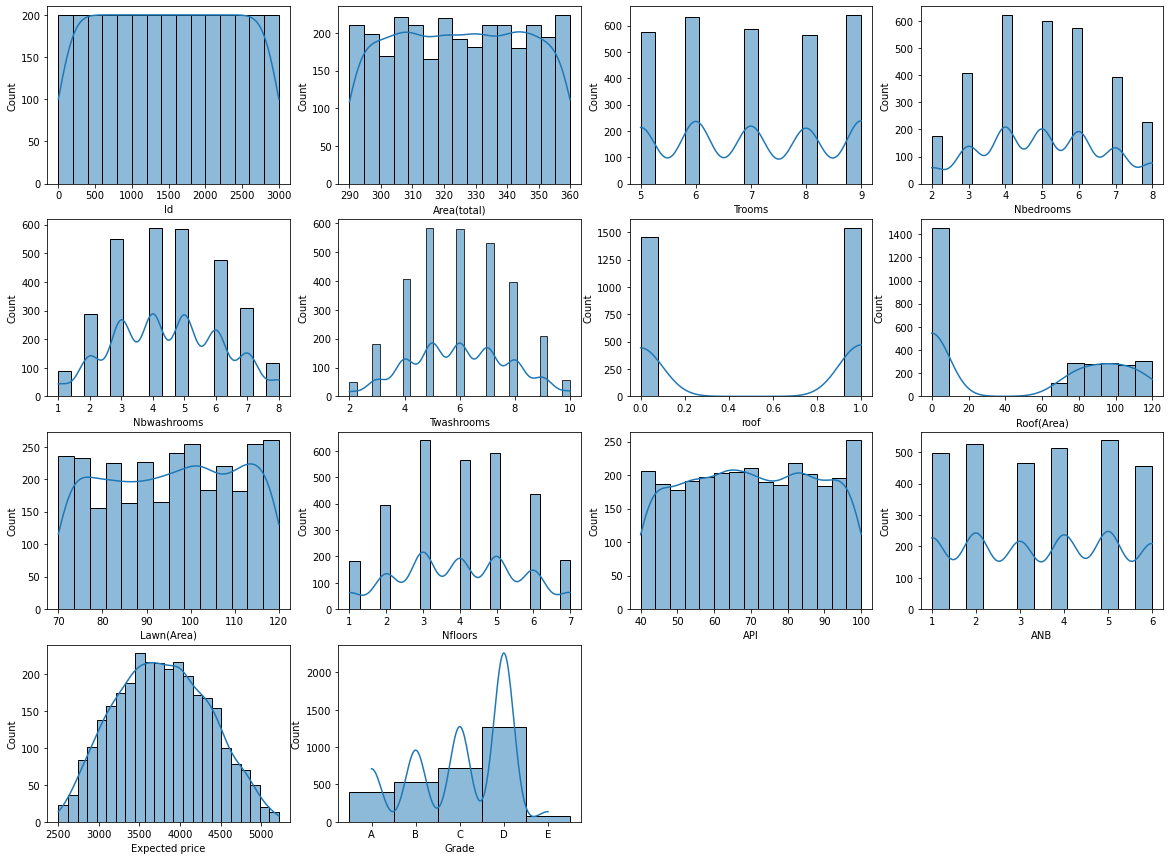

In [92]:
plt.figure(figsize=(20,15))
for i in enumerate(df.columns):
    plt.subplot(4,4,i[0]+1)
    sns.histplot(x=i[1],data=df,kde=True)

In [79]:
df.head(3)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C


# Features engineering

In [5]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [4]:
df['roof']=df['roof'].astype('category')
df['Grade']=df['Grade'].astype('category')

In [5]:
label_en=LabelEncoder()

df['roof']=label_en.fit_transform(df['roof'])
df['Grade']=label_en.fit_transform(df['Grade'])

In [6]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


# Scaling data

In [7]:
a=df.dtypes
a

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

In [8]:
scaler=MinMaxScaler()

for i,j in zip(a.index,a.values):
    if i !='Grade':
        df[i]= scaler.fit_transform(np.array(df[i]).reshape(-1,1))
   

In [9]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,3
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,3
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,2
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,3
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,3


In [10]:
corr_df=df.corr()
corr_df['Grade'].sort_values(ascending=False)

Grade             1.000000
Id               -0.006074
ANB              -0.024025
Lawn(Area)       -0.051200
API              -0.099000
roof             -0.166635
Roof(Area)       -0.170259
Area(total)      -0.177332
Expected price   -0.760820
Nfloors          -0.787623
Twashrooms       -0.819280
Nbwashrooms      -0.847319
Nbedrooms        -0.865389
Trooms           -0.875145
Name: Grade, dtype: float64

<AxesSubplot:>

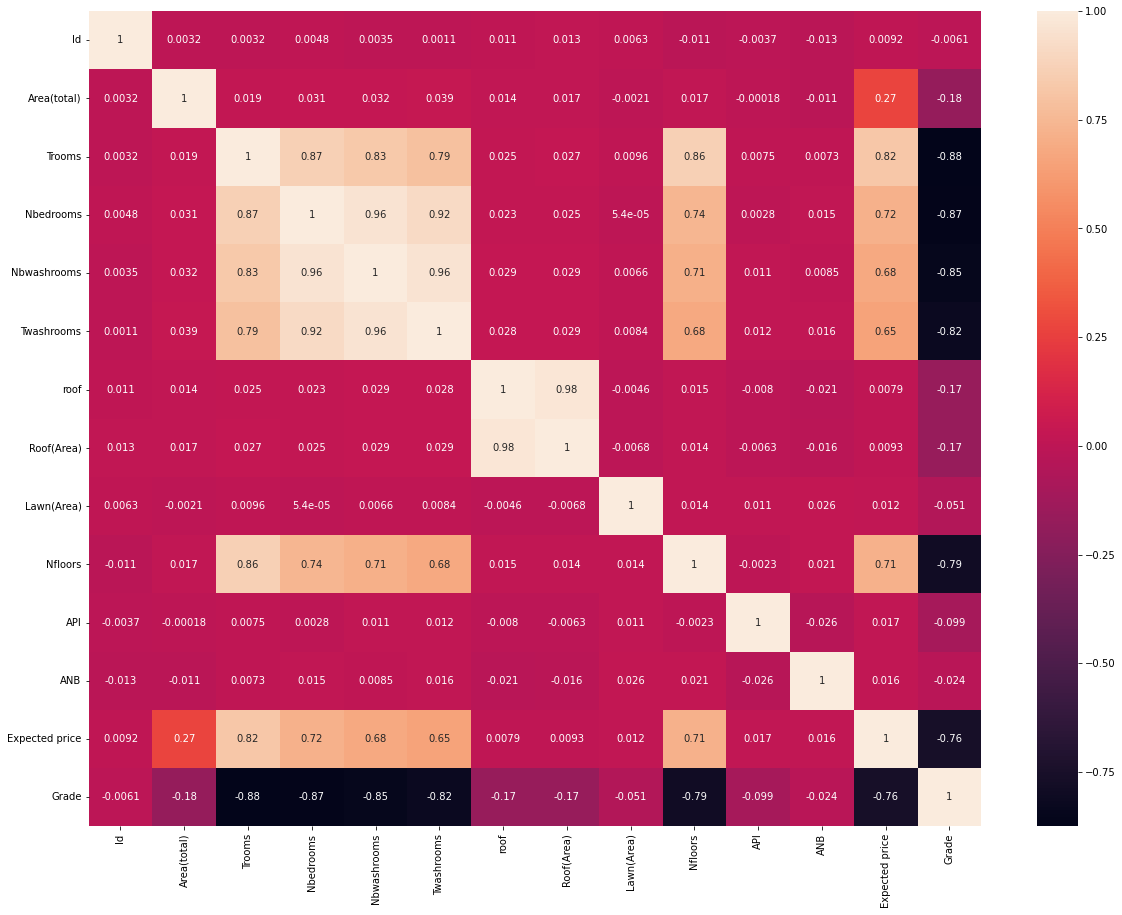

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)


# Spliting Data

In [12]:
X=df[['Trooms','Nbedrooms','Nbwashrooms','Nfloors','Expected price','Area(total)','Roof(Area)']]
y=np.array(df['Grade']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
y_test

array([[2],
       [2],
       [3],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [3],
       [3],
       [3],
       [3],
       [0],
       [0],
       [0],
       [3],
       [2],
       [3],
       [3],
       [3],
       [3],
       [2],
       [0],
       [3],
       [0],
       [2],
       [3],
       [2],
       [1],
       [3],
       [0],
       [0],
       [0],
       [3],
       [3],
       [2],
       [1],
       [3],
       [2],
       [3],
       [2],
       [1],
       [3],
       [3],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [3],
       [3],
       [1],
       [1],
       [2],
       [3],
       [1],
       [3],
       [2],
       [3],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [3],
       [1],
       [3],
       [3],
       [2],
       [1],
       [3],
       [0],
       [3],
       [3],
       [3],
       [1],
       [3],
       [0],
       [3],
       [3],
    

# Model Building

In [52]:
names=[]
acc=[]
cv=[]
f1=[]
cvf1=[]

In [53]:
names

[]

# Logestic regressoin

In [17]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

acctrain=model.score(X_train, y_train)*100
acctest=accuracy_score(y_test, y_pred)*100
print('Accuracy of train data: ',acctrain)
print('Accuracy of test data: ',acctest)

Accuracy of train data:  0.8776190476190476
Accuracy of test data:  0.8855555555555555


In [35]:

f1score=f1_score(y_test,y_pred,average='weighted').round(4)*100
print('accuracy:', accuracy_score(y_test, y_pred).round(4))*100
print('recall:', recall_score(y_test, y_pred, average='weighted').round(4)*100)
print('f1-score:',f1score )
print('precision:', precision_score(y_test, y_pred,average='weighted').round(4)*100)
#evaluating parameters of classification model

names.append('Logestic Regression')
acc.append(acctest)
f1.append(f1score)

accuracy: 0.8856
recall: 0.8856
f1-score: 0.8771
precision: 0.8698


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[105,  20,   0,   0,   0],
       [  8, 135,  15,   0,   0],
       [  0,  13, 175,  14,   0],
       [  0,   0,  16, 382,   0],
       [  0,   0,   0,  17,   0]], dtype=int64)

In [20]:
pred1=pd.DataFrame({'actual':y_test.flatten(),'Predicted':y_pred.flatten()})
pred1

,actual,Predicted
0,2,2
1,2,2
2,3,3
3,2,2
4,0,0
...,...,...
895,2,2
896,3,3
897,2,2
898,3,3


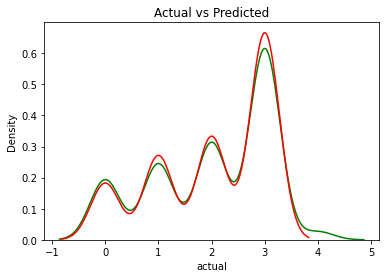

In [21]:
sns.kdeplot(pred1.actual,color='green')
sns.kdeplot(pred1.Predicted,color='red')

plt.title('Actual vs Predicted')
plt.show()
#plot showing how close the actual values and predicted values are 

# Naive Bayes model

In [94]:
gau_model=GaussianNB()
gau_model.fit(X_train,y_train)
y_predg=gau_model.predict(X_test)
accu=accuracy_score(y_test,y_predg).round(4)*100
print('The accuracy score of test data is:',accu)
print('recall:', recall_score(y_test, y_predg, average='weighted').round(4)*100)
print('precision:', precision_score(y_test, y_predg,average='weighted').round(4)*100)
f1_scoreg=f1_score(y_test, y_predg,average='weighted').round(5)*100
print('f1-score:', f1_scoreg)

#f1.append(f1_scoreg)
#names.append('GaussianNB')
#acc.append(accu)

The accuracy score of test data is: 81.89
recall: 81.89
precision: 83.03
f1-score: 82.244


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predg)

array([[108,  17,   0,   0,   0],
       [ 16, 128,  14,   0,   0],
       [  0,  35, 146,  21,   0],
       [  0,   0,  42, 341,  15],
       [  0,   0,   0,   3,  14]], dtype=int64)

In [56]:
predg=pd.DataFrame({'actual':y_test.flatten(),'Predicted':y_predg.flatten()})
predg

,actual,Predicted
0,2,2
1,2,2
2,3,3
3,2,2
4,0,0
...,...,...
895,2,3
896,3,3
897,2,2
898,3,3


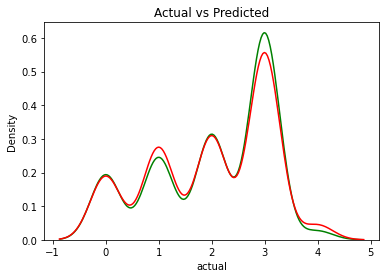

In [57]:
sns.kdeplot(predg.actual,color='green')
sns.kdeplot(predg.Predicted,color='red')

plt.title('Actual vs Predicted')
plt.show()
#plot showing how close the actual values and predicted values are 

# Using Crossvalidation

In [58]:
cvr = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=42)
model = GaussianNB()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
cv.append(n_scores.round(4))
cvf1.append(cross_val_score(model, X, y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)

Accuracy: 80.000 (0.000)


# Decission Tree

In [59]:
dtm=DecisionTreeClassifier()
dtm.fit(X_train,y_train)
y_predd=dtm.predict(X_test)
accuracyd=accuracy_score(y_test, y_predd).round(4)*100
f1scored=f1_score(y_test,y_predd,average='weighted').round(4)*100
print('accuracy:', accuracy_score(y_test, y_predd).round(4)*100)
print('recall:', recall_score(y_test, y_predd, average='weighted').round(4)*100)
print('f1-score:',f1scored )
print('precision:', precision_score(y_test, y_predd,average='weighted').round(4)*100)

names.append('DecissionTreeClassidier')
f1.append(f1scored)
acc.append(accuracyd)


accuracy: 82.78
recall: 82.78
f1-score: 83.06
precision: 83.54


## Cross validation decision tree classifier

In [60]:

model = DecisionTreeClassifier()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100

cv.append(n_scores)
cvf1.append(cross_val_score(model, X, y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 82.000 (0.000)


In [61]:
confusion_matrix(y_test,y_predd)

array([[102,  23,   0,   0,   0],
       [ 12, 127,  19,   0,   0],
       [  0,  20, 158,  24,   0],
       [  0,   0,  37, 348,  13],
       [  0,   0,   0,   7,  10]], dtype=int64)

In [62]:
predd=pd.DataFrame({'actual':y_test.flatten(),'Predicted':y_predd.flatten()})
predd

,actual,Predicted
0,2,2
1,2,2
2,3,3
3,2,2
4,0,0
...,...,...
895,2,2
896,3,3
897,2,2
898,3,3


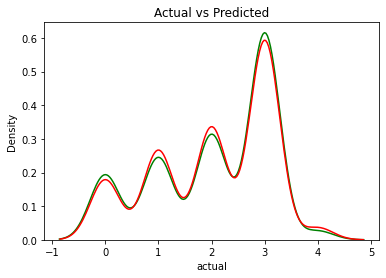

In [63]:
sns.kdeplot(predd.actual,color='green')
sns.kdeplot(predd.Predicted,color='red')

plt.title('Actual vs Predicted')
plt.show()

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True).fit(X_train, y_train)
scorer=model.score(X_train,y_train).round(3)*100
y_predr=model.predict(X_test)
accuracyr=accuracy_score(y_test, y_predr).round(4)*100
f1scorer=f1_score(y_test,y_predr,average='weighted').round(4)*100
print('accuracy:', accuracy_score(y_test, y_predr).round(4)*100)
print('recall:', recall_score(y_test, y_predr, average='weighted').round(4)*100)
print('f1-score:',f1scorer )
print('precision:', precision_score(y_test, y_predr,average='weighted').round(4)*100)

names.append('RandomForestClassifier')
#f1.append(f1scorer)
#acc.append(accuracyr)


accuracy: 85.33
recall: 85.33
f1-score: 84.49
precision: 83.89999999999999


# Cross validation on random forest classifier

In [66]:
model = RandomForestClassifier()

n_scoresr = cross_val_score(model,X,y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100

cv.append(n_scoresr)
cvf1.append(cross_val_score(model,X,y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scoresr), std(n_scoresr)))

F1-Score: 87.000 (0.000)


### Parameter Tuning

In [67]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [70]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [71]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [72]:
grid_search.best_score_

0.860952380952381

In [73]:
#Building model with best parameters

In [74]:
rf_model=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42).fit(X_train, y_train)
y_predr1=rf_model.predict(X_test)
accuracyr1=accuracy_score(y_test, y_predr1).round(4)*100
f1scorer1=f1_score(y_test,y_predr1,average='weighted').round(4)*100
print('accuracy:', accuracy_score(y_test, y_predr1).round(4)*100)
print('recall:', recall_score(y_test, y_predr1, average='weighted').round(4)*100)
print('f1-score:',f1scorer )
print('precision:', precision_score(y_test, y_predr1,average='weighted').round(4)*100)

accuracy: 88.11
recall: 88.11
f1-score: 84.49
precision: 87.88


In [75]:
#names.append('RFC with tuning')
f1.append(f1scorer1)
acc.append(accuracyr1)

# Boosting

In [76]:
modelad = AdaBoostClassifier().fit(X_train,y_train)
y_predad=modelad.predict(X_test)

accuracyad=accuracy_score(y_test, y_predad).round(4)*100
f1scoread=f1_score(y_test,y_predad,average='weighted').round(4)*100
print('accuracy:', accuracy_score(y_test, y_predad).round(4)*100)
print('recall:', recall_score(y_test, y_predad, average='weighted').round(4)*100)
print('f1-score:',f1scoread )
print('precision:', precision_score(y_test, y_predad,average='weighted').round(4)*100)

acc.append(accuracyad)
f1.append(f1scoread)

accuracy: 59.67
recall: 59.67
f1-score: 56.87
precision: 60.440000000000005


In [77]:

model = AdaBoostClassifier()


ada_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100

cv.append(ada_scores)
cvf1.append(cross_val_score(model, X, y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)
names.append('Adaboosting')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(ada_scores), std(ada_scores)))

Accuracy: 63.000 (0.000)


# Stacking

In [78]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', AdaBoostClassifier()))
	# define meta learner model
	level1 = GaussianNB()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [79]:
modelst = get_stacking().fit(X_train,y_train)
y_predst=modelst.predict(X_test)

accuracyst=(accuracy_score(y_test, y_predst).round(4)*100)
f1scorest=f1_score(y_test,y_predst,average='weighted').round(4)*100
print('accuracy:', accuracyst)
print('recall:', recall_score(y_test, y_predst, average='weighted').round(4)*100)
print('f1-score:',f1scorest )
print('precision:', precision_score(y_test, y_predst,average='weighted').round(4)*100)

acc.append(accuracyst)
f1.append(f1scorest)


accuracy: 79.44
recall: 79.44
f1-score: 82.34
precision: 88.42


In [80]:
model = get_stacking()

# evaluate the model
st_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100
cv.append(st_scores)
cvf1.append( cross_val_score(model, X, y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)
names.append('Stacking')

print('Accuracy:',round(mean(n_scores)*100,2))

Accuracy: 8200.0


# KNN Model

Minimum error: 0.7004876543209877 at K = 13


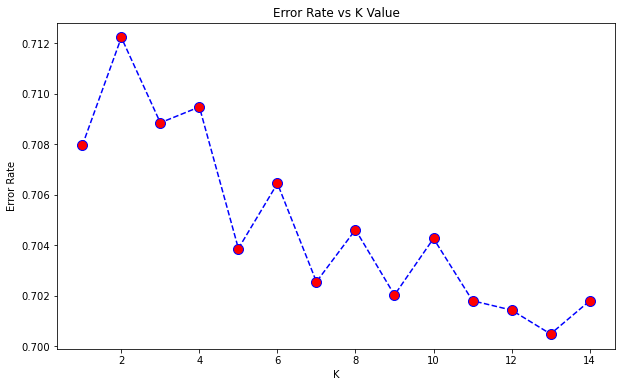

In [108]:
#Error rate based on k values
error_rate = []
k_lst=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i in k_lst:
  clf2 = KNeighborsClassifier(n_neighbors=i)
  clf2.fit(X_train,y_train)
  pred_i = clf2.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(k_lst,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
k=error_rate.index(min(error_rate))+1

In [117]:
#rebuilding model with least error k value 
clf3 = KNeighborsClassifier(k)
clf3.fit(X_train, y_train)
y2_pred=clf3.predict(X_test)
accuracyknn=accuracy_score(y_test, y2_pred).round(4)*100#evaluating 
f1knn=f1_score(y_test,y2_pred,average='weighted').round(3)*100

#names.append('KNeighborsClassifier')
#acc.append(accuracyknn)
#f1.append(f1knn)

In [118]:
print('f1-score:',f1knn )
print('Accuracy:',accuracyknn )

f1-score: 87.8
Accuracy: 88.0


In [123]:
model = KNeighborsClassifier(k)

# evaluate the model
st_scorekn = cross_val_score(model, X, y, scoring='accuracy', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100
cv.append(st_scorekn)
cvf1.append( cross_val_score(model, X, y, scoring='f1_weighted', cv=cvr, n_jobs=-1, error_score='raise').mean().round(2)*100)
names.append('Stacking')

print('Accuracy:',round(mean(st_scorekn)*100,2))

Accuracy: 8700.0


In [125]:
acc

[81.89, 82.78, 88.11, 59.67, 79.44, 88.0]

In [126]:
cv

[80.0, 82.0, 87.0, 63.0, 78.0, 86.0, 87.0]

In [127]:
cvf1

[80.0, 82.0, 87.0, 60.0, 80.0, 86.0, 87.0]

In [119]:
f1[5]=87.83

In [128]:
f1

[82.24, 83.06, 87.8, 56.87, 82.34, 87.83]

In [129]:
final_f1=pd.DataFrame(list(zip(names,f1)),columns=['Algorithm','F1-Score']).set_index('Algorithm').sort_values(by='F1-Score',ascending=False)
final_acc=pd.DataFrame(list(zip(names,acc)),columns=['Algorithm','Accuracy']).set_index('Algorithm').sort_values(by='Accuracy',ascending=False)
final_acccv=pd.DataFrame(list(zip(names,cv)),columns=['Algorithm','Accuracy-CV']).set_index('Algorithm').sort_values(by='Accuracy-CV',ascending=False)
final_f1cv=pd.DataFrame(list(zip(names,cvf1)),columns=['Algorithm','F1-CV']).set_index('Algorithm').sort_values(by='F1-CV',ascending=False)

In [130]:
final_f1

,F1-Score
Algorithm,
KNeighborsClassifier,87.83
RandomForestClassifier,87.80
DecissionTreeClassidier,83.06
Stacking,82.34
GaussianNB,82.24
Adaboosting,56.87


# ROC-AUC

In [154]:
df['Grade'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [149]:
roc = {label: [] for label in df['Grade'].unique()}
for label in df['Grade'].unique():
    gau_model.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])

array([[7.56721052e-023, 5.78750722e-002, 9.42019418e-001],
       [2.21387577e-022, 7.89797409e-002, 9.20635872e-001],
       [4.27305815e-108, 3.05869192e-024, 2.45459583e-007],
       ...,
       [4.74376574e-009, 2.97020204e-001, 7.02963397e-001],
       [4.89575732e-055, 3.83541085e-008, 1.85457542e-001],
       [2.22925274e-110, 1.81590379e-026, 1.09775705e-008]])

In [160]:
from sklearn.metrics import roc_auc_score
#Naive bayes roc auc scores
roc=roc_auc_score(y_test, gau_model.predict_proba(X_test), multi_class="ovr")
roc1=roc_auc_score(y_test, dtm.predict_proba(X_test), multi_class="ovr")
roc2=roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class="ovr")
roc3=roc_auc_score(y_test, modelad.predict_proba(X_test), multi_class="ovr")
roc4=roc_auc_score(y_test, modelst.predict_proba(X_test), multi_class="ovr")
roc5=roc_auc_score(y_test, clf3.predict_proba(X_test), multi_class="ovr")

print('ROC AUC score for Naive bayes model:',roc)
print('ROC AUC score for Decision tree model:',roc1)
print('ROC AUC score for Random forest model:',roc2)
print('ROC AUC score for Adaboost model:',roc3)
print('ROC AUC score for Stacking model:',roc4)
print('ROC AUC score for KNN model:',roc5)

ROC AUC score for Naive bayes model: 0.9662227618583025
ROC AUC score for Decision tree model: 0.8634442734927633
ROC AUC score for Random forest model: 0.9844046483528587
ROC AUC score for Adaboost model: 0.7194925645987894
ROC AUC score for Stacking model: 0.9800310245387343
ROC AUC score for KNN model: 0.9844471660567132


In [161]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf3.predict_proba(X_test)

In [165]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs,multi_class="ovr")
lr_auc = roc_auc_score(y_test, lr_probs,multi_class="ovr")
#print(ns_auc);print(lr_auc)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#print(ns_fpr);print(ns_tpr)
#print(lr_fpr);print(lr_tpr)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
[:, 1]